# Player Analysis - Sergio Busquets(Defensive Midfielder, FC Barcelona)

- This is an analysis of Sergio Busquets' 2020-21 season.
- Busquets mainly plays as a Defensive Midfielder and his role involves making sure he intercepts the opposition passes when they are on the attack and stop their attacks as well as making tackles to win the ball back from them. Thus he provides defensive security when the opposition is on the attack. His role also includes him creating play from deep in the midfield and threading in passes to the attacking third as well as making sure the team moves in the right direction during attack by making short passes.
- The data was gathered from StatsBomb via FBref and contains the per90 minutes stats of all the players in the Top 5 major leagues in Europe. We will further filter it down to those who have played at least 10 90 minute games and are Midfielders and later to Busquets' stats.
- Once this is done, we calculate the percentiles and compare it with the rest of the midfielders in Top 5 European Leagues.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager

In [2]:
df = pd.read_csv('big_5_leagues_mid.csv')

In [3]:
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,TklW,...,Progressive Carries,Final 1/3 Carries,Final 1/3 Pass,Progressive Passes,Key Passes,xA,Shot Creating Actions,Goal Creating Actions,Touches in Attacking 1/3,Passes into 18 yd box
0,1,Ismael Aaneba\Ismael-Aaneba,fr FRA,FWDF,Strasbourg,fr Ligue 1,21.0,1999.0,0.1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,19.7,0.96,...,5.79,1.52,3.45,5.69,0.56,0.04,1.32,0.15,17.50,1.32
2,3,Issah Abbas\Issah-Abbas,gh GHA,DFFW,Mainz 05,de Bundesliga,21.0,1998.0,0.2,0.00,...,10.00,5.00,5.00,5.00,0.00,0.00,0.00,0.00,40.00,0.00
3,4,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,32.1,1.43,...,1.81,0.25,2.52,2.83,0.12,0.01,0.34,0.00,1.28,0.03
4,5,Sabit Abdulai\Sabit-Abdulai,gh GHA,MF,Getafe,es La Liga,21.0,1999.0,0.7,0.00,...,1.43,1.43,0.00,1.43,0.00,0.00,0.00,0.00,8.57,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,2819,Steven Zuber\Steven-Zuber,ch SUI,DFMF,Eint Frankfurt,de Bundesliga,28.0,1991.0,6.5,2.31,...,7.38,2.31,3.23,4.62,2.00,0.29,3.38,0.62,29.80,1.69
2819,2820,Martín Zubimendi\Martin-Zubimendi,es ESP,MF,Real Sociedad,es La Liga,21.0,1999.0,20.9,1.00,...,4.74,1.44,4.83,4.59,0.29,0.03,1.20,0.14,7.66,0.57
2820,2821,Martin Ødegaard\Martin-Odegaard,no NOR,MF,Arsenal,eng Premier League,21.0,1998.0,9.6,0.52,...,8.13,1.77,3.54,5.00,2.19,0.22,4.36,0.62,30.10,1.88
2821,2822,Martin Ødegaard\Martin-Odegaard,no NOR,MFFW,Real Madrid,es La Liga,21.0,1998.0,2.6,0.00,...,7.69,3.08,6.15,3.46,1.92,0.15,2.31,0.00,29.20,0.77


In [4]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'TklW', 'Successful Pressures', 'Pressures in Mid 3rd', 'Blocks',
       'Interceptions', 'Progressive Carries', 'Final 1/3  Carries',
       'Final 1/3 Pass', 'Progressive Passes', 'Key Passes', 'xA',
       'Shot Creating Actions', 'Goal Creating Actions',
       'Touches in Attacking 1/3', 'Passes into 18 yd box'],
      dtype='object')

In [5]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [6]:
#Filtering out only the Midfielders and those who have played 10+ 90 minute games
df = df[(df['Pos']=='MF') & (df['90s']>=10)]

In [7]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,TklW,...,Progressive Carries,Final 1/3 Carries,Final 1/3 Pass,Progressive Passes,Key Passes,xA,Shot Creating Actions,Goal Creating Actions,Touches in Attacking 1/3,Passes into 18 yd box
5,6,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,27.0,1992.0,14.7,1.63,...,4.08,1.50,4.08,2.86,0.82,0.05,1.91,0.07,11.80,0.48
6,7,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,27.0,1993.0,32.9,3.28,...,3.25,1.03,3.43,3.37,0.64,0.04,1.70,0.27,9.39,0.52
22,23,Yacine Adli,fr FRA,MF,Bordeaux,fr Ligue 1,20.0,2000.0,26.9,2.30,...,5.80,1.78,5.50,5.24,1.97,0.17,3.42,0.30,15.40,0.89
33,34,Matteo Ahlinvi,bj BEN,MF,Nîmes,fr Ligue 1,21.0,1999.0,10.0,1.90,...,4.40,1.10,1.60,1.60,0.40,0.03,1.00,0.00,8.90,0.20
35,36,Jean-Eudes Aholou,ci CIV,MF,Strasbourg,fr Ligue 1,26.0,1994.0,23.8,1.47,...,2.69,1.18,2.82,2.31,0.29,0.05,1.05,0.17,8.74,0.29


In [8]:
#Dropping columns not necessary for the analysis
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','Comp','90s'],axis=1).reset_index()

In [9]:
df.head()

,index,Player,TklW,Successful Pressures,Pressures in Mid 3rd,Blocks,Interceptions,Progressive Carries,Final 1/3 Carries,Final 1/3 Pass,Progressive Passes,Key Passes,xA,Shot Creating Actions,Goal Creating Actions,Touches in Attacking 1/3,Passes into 18 yd box
0,5,Mehdi Abeid,1.63,5.78,9.05,1.22,1.56,4.08,1.50,4.08,2.86,0.82,0.05,1.91,0.07,11.80,0.48
1,6,Laurent Abergel,3.28,8.18,16.40,1.55,1.40,3.25,1.03,3.43,3.37,0.64,0.04,1.70,0.27,9.39,0.52
2,22,Yacine Adli,2.30,6.91,13.30,1.34,1.52,5.80,1.78,5.50,5.24,1.97,0.17,3.42,0.30,15.40,0.89
3,33,Matteo Ahlinvi,1.90,5.90,13.30,1.30,0.40,4.40,1.10,1.60,1.60,0.40,0.03,1.00,0.00,8.90,0.20
4,35,Jean-Eudes Aholou,1.47,5.13,9.71,1.09,2.27,2.69,1.18,2.82,2.31,0.29,0.05,1.05,0.17,8.74,0.29


In [10]:
#Creating a parameter list of columns which will later help in plotting the percentiles
params = list(df.columns)

In [11]:
params

['index',
 'Player',
 'TklW',
 'Successful Pressures',
 'Pressures in Mid 3rd',
 'Blocks',
 'Interceptions',
 'Progressive Carries',
 'Final 1/3  Carries',
 'Final 1/3 Pass',
 'Progressive Passes',
 'Key Passes',
 'xA',
 'Shot Creating Actions',
 'Goal Creating Actions',
 'Touches in Attacking 1/3',
 'Passes into 18 yd box']

In [12]:
params = params[2:]

In [13]:
params

['TklW',
 'Successful Pressures',
 'Pressures in Mid 3rd',
 'Blocks',
 'Interceptions',
 'Progressive Carries',
 'Final 1/3  Carries',
 'Final 1/3 Pass',
 'Progressive Passes',
 'Key Passes',
 'xA',
 'Shot Creating Actions',
 'Goal Creating Actions',
 'Touches in Attacking 1/3',
 'Passes into 18 yd box']

Now to filter out the stats for just Sergio Busquets. The name should be spelt exactly how it is and that is the reason why I have checked all the players and copied Sergio Busquets from there so as to not make any spelling mistakes.

In [14]:
df['Player'].unique()

array(['Mehdi Abeid', 'Laurent Abergel', 'Yacine Adli', 'Matteo Ahlinvi',
       'Jean-Eudes Aholou', 'Jean-Daniel Akpa-Akpro', 'Luis Alberto',
       'Thiago Alcántara', 'Rubén Alcaraz', 'Allan', 'Ibrahim Amadou',
       'Nadiem Amiri', 'Sofyan Amrabat', 'Benjamin André',
       'Robert Andrich', 'Victorien Angban', 'Mauro Arambarri',
       'Charles Aránguiz', 'Luiz Araújo', 'Stuart Armstrong',
       'Maximilian Arnold', 'Tolgay Arslan', 'Milan Badelj',
       'Tiemoué Bakayoko', 'Jonathan Bamba', 'Enis Bardhi',
       'Nicolò Barella', 'Ross Barkley', 'Leandro Barreiro Martins',
       'Toma Bašić', 'Rodrigo Battaglia', 'Julian Baumgartlinger',
       'Haris Belkebla', 'Jude Bellingham', 'Fran Beltrán',
       'Ahmad Benali', 'Ismaël Bennacer', 'Yassine Benrahou',
       'Rodrigo Bentancur', 'Jóhann Berg Guðmundsson', 'Sander Berge',
       'Valon Berisha', 'Yves Bissouma', 'Giacomo Bonaventura',
       'Robbie Brady', 'Darko Brašanac', 'Yan Brice Eteki',
       'Josh Brownhill', '

In [15]:
player = df[df['Player']=='Sergio Busquets'].reset_index()
player = list(player.loc[0])
player = player[3:]
player

[1.43,
 6.14,
 10.8,
 1.54,
 1.39,
 5.14,
 1.64,
 10.5,
 7.79,
 1.07,
 0.13,
 2.43,
 0.36,
 22.0,
 1.18]

In [16]:
print(len(player),print(len(params)))

15
15 None


In [17]:
#Calculating the percentile rank for the player w.r.t each metric
values = []

for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [18]:
values

[52, 72, 73, 51, 62, 72, 71, 99, 97, 68, 81, 72, 83, 86, 81]

In [19]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

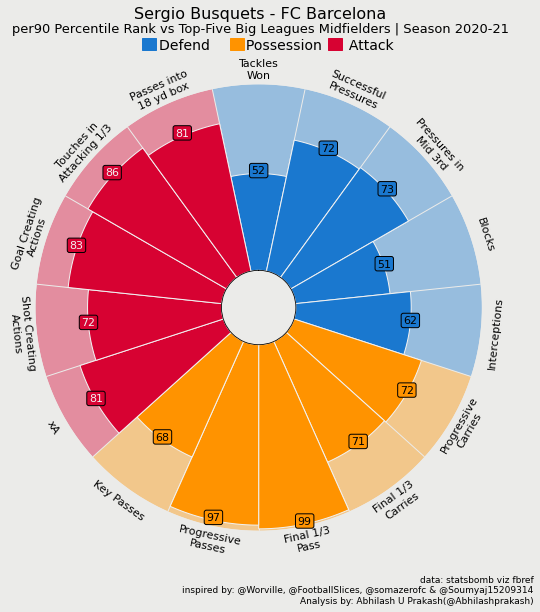

In [20]:
#Renaming the parameters for a better reading on the plot
params1 = ['Tackles\nWon',
 'Successful\nPressures',
 'Pressures in\nMid 3rd',
 'Blocks',
 'Interceptions',
 'Progressive\nCarries',
 'Final 1/3 \nCarries',
 'Final 1/3\nPass',
 'Progressive\nPasses',
 'Key Passes',
 'xA',
 'Shot Creating\nActions',
 'Goal Creating\nActions',
 'Touches in\nAttacking 1/3',
 'Passes into\n18 yd box']


slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5 #slice colors
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5 #slice text colors

# instantiate PyPizza class
baker = PyPizza(
    params=params1,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
         va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

#Title
fig.text(
    0.515, 0.975, "Sergio Busquets - FC Barcelona", size=16,
    ha="center", color="#000000"
)

#Subtitle
fig.text(
    0.515, 0.953,
    "per90 Percentile Rank vs Top-Five Big Leagues Midfielders | Season 2020-21",
    size=13,
    ha="center",  color="#000000"
)

#Credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
MADE_BY = "Analysis by: Abhilash U Prakash(@Abhilashprakash)"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}\n{MADE_BY}", size=9,
     color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Defend        Possession      Attack", size=14,
     color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])



**From the pizza plot we can see that Busquets has had a good season despite many criticisms that came in his way for most of the season. His shot creating actions and goal creating actions as well as his passes into the final third have resulted in some really good play by the team as well as goals being scored. His defensive duties have also been good considering he ranks in the 62nd percentile when it comes to interceptions and his Pressing being successful which is in the 72nd percentile.**